# More Distributions and the Central Limit Theory

1. The Normal Distribution

2. The Central Limit Theorem

3. The Poisson Distribution

4. Exponential Distribution

5. T Distribution

6. Log Normal Distribution.

## The Normal Distribution

The normal distribution is one of the most important probability distributions since a countless number of statistical methods rely on it, and it applies to most real-world situations.

### Properties of a normal distribution

1. Symmetrical

First, it's symmetrical, so the left side is a mirror image of the right.

2. Area = 1

Second, just like any continuous distribution, the area beneath the curve is 1.

3. Curve never hits 0

Second, the probability never hits 0, even if it looks like it does at the tail ends.

4. Described by mean and standard deviation

The normal distribution is described by its mean and standard deviation. When a normal distribution has mean 0 and a standard deviation of 1, it's a special distribution called the standard normal distribution.

5. Areas under the normal distribution

For the normal distribution, 68% of the area is within 1 standard deviation of the mean. 95% of the area falls within 2 standard deviations of the mean, and 99.7% of the area falls within three standard deviations. This is sometimes called the 68-95-99-point-7 rule.

There's lots of real-world data shaped like the normal distribution. For example, the heights of women that participated in the National Health and Nutrition Examination Survey. The **mean** height is around 161 centimeters and the **standard deviation** is about 7 centimeters.

In [106]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import expon

In [107]:
# load dataset
amir_deals = pd.read_csv('amir_deals.csv', index_col=0)

In [108]:
# info
amir_deals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 178
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   product    178 non-null    object 
 1   client     178 non-null    object 
 2   status     178 non-null    object 
 3   amount     178 non-null    float64
 4   num_users  178 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 8.3+ KB


In [109]:
# head
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


Normal Cumulative Density Function

In [110]:
# what percentage of women are shorter than 154cm?
# norm.cdf( number of interest,  mean, standard deviation ) 

norm.cdf(154, 161, 7)

0.15865525393145707

16% of wowen are shorter than 154cm

In [111]:
# What percentage of women are taller than 154cm?
1 - norm.cdf(154, 161, 7)

0.8413447460685429

84% of women are taller than 154 cm

In [112]:
# what percent of women is between 154 and 157 cm
norm.cdf(157, 161, 7) - norm.cdf(154, 161, 7)

0.1251993291672192

12% of women are between 154 to 157cm

normal percent point function

In [113]:
#  What height are 90% of women shorter than?
norm.ppf(0.9, 161, 7)

169.9708609588122

In [114]:
# what height are 90% of the women taller than?
norm.ppf(1-0.9, 161, 7)

152.0291390411878

Generating Random numbers from a normal distribution

Just like with other distributions, we can generate random numbers from a normal distribution using norm.rvs, (normal random value sample) passing in the distribution's mean and standard deviation, as well as the sample size we want. Here, we've generated 10 more random heights.

In [115]:
norm.rvs(161, 7, size=10)

array([162.39469824, 149.41015952, 148.88181143, 170.3400404 ,
       160.85569146, 167.3781406 , 146.68404452, 167.2917663 ,
       159.02780055, 153.69669326])

Distribution of Amir's sales

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

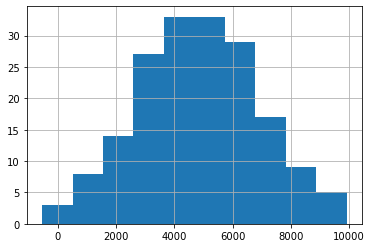

In [116]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

Probabilities from the normal distribution

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

In [117]:
amir_deals.describe()

,amount,num_users
count,178.000000,178.000000
mean,4812.000337,37.651685
std,2058.173225,27.354794
min,-539.230000,1.000000
25%,3415.927500,14.250000
50%,4805.190000,32.500000
75%,6217.257500,58.000000
max,9913.270000,99.000000


In [118]:
# What's the probability of Amir closing a deal worth less than $7500?
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

0.8943502263331446


In [119]:
# What's the probability of Amir closing a deal worth more than $1000?
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)


0.9772498680518208


In [120]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

0.6826894921370859


In [121]:
# What amount will 25% of Amir's sales be less than?
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

3651.0204996078364


Simulating sales under new market conditions

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame.

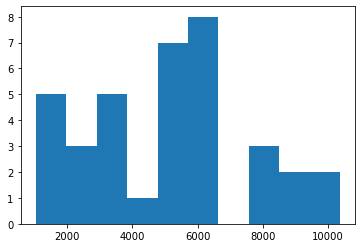

In [122]:
# Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% 
# and store this in new_mean.
new_mean = 1.2 * 5000


# Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% 
# and store this in new_sd.
new_sd = 1.3 * 2000

# Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and
#  a standard deviation of new_sd.
new_sales = norm.rvs(new_mean, new_sd, size=36)


# Plot the distribution of the new_sales amounts using a histogram and show the plot.
plt.hist(new_sales)
plt.show()


Successful simulating! Although the average sale amount went up, the variation also increased, so it's not straightforward to decide whether these sales are better than his current ones. In the next exercise, you'll explore the effects of higher variation.

### Which market is better?

The key metric that the company uses to evaluate sales people is the percent of sales they make over $1000 since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of $5000 and a standard deviation of $2000, and Amir's predicted amounts in next quarter's market have a mean of $6000 and a standard deviation of $2600.

Based only on the metric of percent of sales over $1000, does Amir perform better in the current market or the predicted market?

In [123]:
current = 1 - norm.cdf(1000, 5000, 2000)
print(current)

predicted = 1 - norm.cdf(1000, 6000, 2600)
print(predicted)

0.9772498680518208
0.9727648049862613


 In the current market, Amir makes sales over $1000 about 97.7% of the time, and about 97.3% of the time in the predicted market, so there's not much of a difference. However, his average sale amount is higher in the predicted market, so your company may want to consider other metrics as well.

## The central limit theorem

In [124]:
die = pd.Series([1,2,3,4,5,6])
print(die)
# roll the die 5 times
samp_5 = die.sample(5, replace=True)
print(samp_5)

# mean of the 5 rolls
np.mean(samp_5)

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64
1    2
0    1
2    3
5    6
4    5
dtype: int64


3.4

In [125]:
# do it again
samp_5 = die.sample(5, replace=True)
np.mean(samp_5)

2.8

Repeat the process 10 times.
Rolling the dice 5 times 10 times

In [126]:
# create an empty list to hold the means.
sample_means = []

# loop from 0 to 9
for i in range(10):
    '''roll 5 times and append the mean to the sample's mean list '''
    samp_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(samp_5))

print(sample_means)

[3.0, 4.0, 3.8, 4.4, 2.4, 2.6, 3.2, 3.2, 3.4, 4.0]


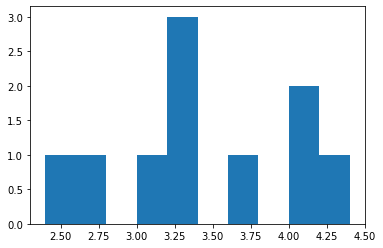

In [127]:
# plot the sample means
plt.hist(sample_means);

A distribution of a summary statistic like this is called a sampling distribution.

Repeat the process 100 times

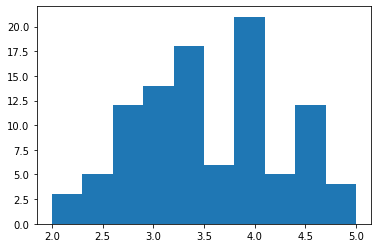

In [128]:
sample_means = []
for i in range(100):
    sample_means.append(np.mean(die.sample(5, replace=True)))

# plot the sampling mean distribution
plt.hist(sample_means);
plt.show();

Its shape somehow resembles the normal distribution

1000 sample means

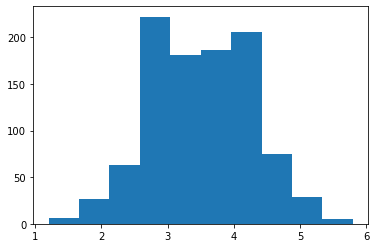

In [129]:
sample_means = []
for i in range(1000):
    sample_means.append(np.mean(die.sample(5, replace=True)))

# plot 
plt.hist(sample_means);
plt.show();


It more closely resembles the normal distribution. This phenomenon is called the Central Limit Theorem.

CLT states that the sampling distribution of a statistic becomes loser to the normal distribution as the number of trials increases.

The Central Limit Theorem only occurs when 

1. Samples are taken randomly and are independent.

The CLT also applies to other summary statistics such as the Standard deviation, proportions

Since the sampling distributions are normal, we can take their mean to get an estimate of a distributions mean, standard deviation or proportions. 

The CLT comes in handy when:

1. We want to estimate characteristics of unknown underlying distribution.

2. More easily estimate characteristics of large populations. 

In [130]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


focus on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling.

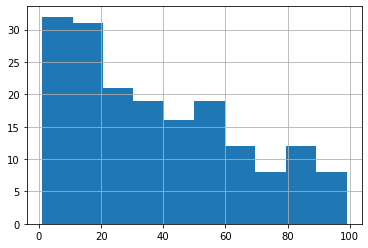

In [131]:
# create a histogram of num_users 
amir_deals['num_users'].hist();
plt.show();

In [132]:
# set seed to 104
np.random.seed(104)

# take a sample of 20 with replacement from num_users  and take mean
samp_20 = amir_deals.num_users.sample(20, replace=True)

# find the mean
print(np.mean(samp_20))

32.0


In [133]:
sample_means = []

# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals.num_users.sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)

[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


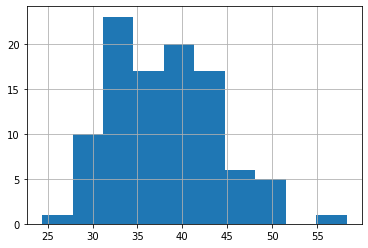

In [134]:
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist();
# Show plot
plt.show();

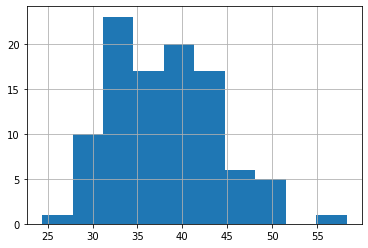

In [135]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

You want to know what the average number of users (num_users) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.

 output:
 
    sample means: 38.31333333333332

    amir deals: 37.651685393258425


Magnificent mean calculation! Amir's average number of users is very close to the overall average, so it looks like he's meeting expectations. Make sure to note this in his performance review!

## The Poisson Distribution

A **Poisson process** is a process where events appear to happen at a certain rate, but completely at random. 

For example, 

the number of animals adopted from an animal shelter each week is a Poisson process - we may know that on average there are 8 adoptions per week, but this number can differ randomly.

Other examples would be the number of people arriving at a restaurant each hour, or the number of earthquakes per year in California. The time unit like, hours, weeks, or years, is irrelevant as long as it's consistent.

**Poisson distribution**

The Poisson distribution describes the probability of some number of events happening over a fixed period of time. We can use the Poisson distribution to calculate

> the probability of at least 5 animals getting adopted in a week, 

> the probability of 12 people arriving in a restaurant in an hour, or 

> the probability of fewer than 20 earthquakes in California in a year.

 Lambda ($\lambda$)
 
The Poisson distribution is described by a value called lambda, which represents the average number of events per time period.

($\lambda$) = average number of events per time interval.

In the animal shelter example, this would be the average number of adoptions per week, which is 8. This value is also the expected value of the distribution! The Poisson distribution with lambda equals 8 looks like this. Notice that it's a discrete distribution since we're counting events, and 7 and 8 are the most likely number of adoptions to happen in a week.

Lambda is the distribution's peak

Lambda changes the shape of the distribution, so a Poisson distribution with lambda equals 1, looks quite different than a Poisson distribution with lambda equals 8, but no matter what, the distribution's peak is always at its lambda value.

### Probability of a single value

Given that the average number of adoptions per week is 8, what's the probability of 5 adoptions in a week? Just like the other probability distributions, we can import poisson from scipy.stats. We'll use the poisson.pmf function, passing 5 as the first argument and 8 as the second argument to indicate the distribution's mean. This gives us about 9%.

The probability mass function (PMF) is used to describe discrete probability distributions. In contrast, the probability density function (PDF) is applied to describe continuous probability distributions.

In [136]:
poisson.pmf(5, 8)

0.09160366159257921

### Probability of less than or equal to

To get the probability that 5 or fewer adoptions will happen in a week, use the poisson.cdf function, passing in the same numbers. This gives us about 20%.

In [137]:
poisson.cdf(5, 8)

0.19123606207962532

### Probability of greater than

Just like other probability functions you've learned about so far, take 1 minus the "less than or equal to 5" probability to get the probability of more than 5 adoptions. There's an 81% chance that more than 5 adoptions will occur. If the average number of adoptions rises to 10 per week, there will be a 93% chance that more than 5 adoptions will occur.

In [138]:
1 - poisson.cdf(5, 8)

0.8087639379203747

In [139]:
1 - poisson.cdf(5, 10)

0.9329140371209681

### Sampling from a Poisson distribution

Just like other distributions, we can take samples from Poisson distributions using poisson.rvs. Here, we'll simulate 10 different weeks at the animal shelter. In one week, there are 14 adoptions, but only 6 in another.

In [140]:
poisson.rvs(8, size=10)

array([ 7,  7, 10, 11,  8,  5, 13, 11,  7,  7])

### The CLT still applies!

Just like other distributions, the sampling distribution of sample means of a Poisson distribution looks normal with a large number of samples.

### Tracking lead responses

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

In [141]:
#  calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.
poisson.pmf(5,4)

0.1562934518505317

In [142]:
# Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?
poisson.pmf(5, 5.5)

0.17140068409793663

In [143]:
# What's the probability that Amir responds to 2 or fewer leads in a day?
poisson.cdf(2, 4)

0.23810330555354436

In [144]:
# What's the probability that Amir responds to more than 10 leads in a day?
1 - poisson.cdf(10, 4)

0.0028397661205137315

Note that if you provide poisson.pmf() or poisson.cdf() with a non-integer, it throws an error since the Poisson distribution only applies to integers.

## Exponential Distribution

The EXPONENTIAL DISTRIBUTION represents the probability of a certain time passing between Poisson events. 

We can use the exponential distribution to predict, for example, 

> the probability of more than 1 day between adoptions, 

> the probability of fewer than 10 minutes between restaurant arrivals, and 

> the probability of 6-8 months passing between earthquakes. 

Just like the Poisson distribution, the time unit doesn't matter as long as it's consistent. 

The exponential distribution uses the same lambda value, which represents the rate, that the Poisson distribution does.

 Note that lambda and rate mean the same value in this context. It's also continuous, unlike the Poisson distribution, since it represents time.

let's say that one customer service ticket is created every 2 minutes. We can rephrase this so it's in terms of a time interval of one minute,

$\lambda$ = 0.5 customer service tickets created each minute

so half of a ticket is created each minute. We'll use 0.5 as the lambda value. The rate affects the shape of the distribution and how steeply it declines.

### Expected value of exponential distribution

Recall that $lambda$ is the expected value of the Poisson distribution, which measures frequency in terms of rate or number of events. In our customer service ticket example, this means that the expected number of requests per minute is 0.5.

The exponential distribution measures frequency in terms of time between events. The **expected value** of the exponential distribution can be calculated by taking 1 divided by lambda. In our example, the expected time between requests is 1 over one half, which is 2, so there is an average of 2 minutes between requests.

### The probability of waiting less than one minute

The probability of waiting less than 1 minute for a new request is calculated using expon.cdf, passing in 1 followed by scale equals point-5, which gives us about an 86% chance. 

In [145]:
# P(wait < 1 min)
expon.cdf(1, scale=0.5)

0.8646647167633873

### The probability of waiting more than 3 minutes

Can be found using 1 minus expon-cdf of 3, scale equals point 5, giving a point-2% chance. 

In [146]:
# P(wait > 3)
1 - expon.cdf(3, scale=0.5)

0.0024787521766663767

### The probability of waiting between 1 and 3 minutes 

Can be found by taking expon-cdf of 3 and subtracting expon-cdf of 1. There's a 13% chance you'll wait between 1 and 3 minutes.

In [147]:
expon.cdf(3, scale=0.5) - expon.cdf(1, scale=0.5)

0.13285653105994633

## (Student's) t-distribution
The t-distribution, is also sometimes called Student's t-distribution. Its shape is similar to the normal distribution, but not quite the same. If we compare the normal distribution, with the t-distribution with one degree of freedom, the t-distribution's tails are thicker. This means that in a t-distribution, observations are more likely to fall further from the mean.

### Degrees of freedom
The t-distribution has a parameter called _degrees of freedom_, which affects the thickness of the distribution's tails. 

Lower degrees of freedom results in thicker tails and a higher standard deviation. As the number of degrees of freedom increases, the distribution looks more and more like the normal distribution.

## Log-normal distribution

Variables that follow a log-normal distribution have a logarithm that is normally distributed. This results in distributions that are skewed, unlike the normal distribution. There are lots of real-world examples that follow this distribution, such as the length of chess games, blood pressure in adults, and the number of hospitalizations in the 2003 SARS outbreak.

Modeling time between leads (Exponential distribution)

To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, it takes 2.5 hours for him to respond. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

In [148]:
# What's the probability it takes Amir less than an hour to respond to a lead?
expon.cdf(1, scale=2.5)

0.3296799539643607

In [149]:
# What's the probability it takes Amir more than 4 hours to respond to a lead?
1 - expon.cdf(4, scale=2.5)

0.20189651799465536

In [150]:
# What's the probability it takes Amir 3-4 hours to respond to a lead?
expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5)

0.09929769391754684